<a href="https://colab.research.google.com/github/zeynepsenatatli/MachineLearningExercises/blob/main/UE03_C3E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Data

### **Data Loading**

### Get datas from downloaded tgz folder

In [ ]:
import tarfile
my_tar = tarfile.open('/content/titanic.tgz')
my_tar.extractall()
my_tar.close()

import pandas as pd

train_data = pd.read_csv('/content/titanic/train.csv')
test_data = pd.read_csv('/content/titanic/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Function to load data from github url (without download)

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [ ]:
train_data_2, test_data_2 = load_titanic_data()
train_data_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring Data

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Rate of people who survived:  38.38383838383838


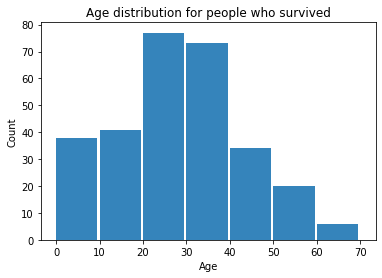

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

s = train_data[train_data['Survived'] == 1]
us = train_data[train_data['Survived'] == 0]
print("Rate of people who survived: ", 100 * s.shape[0]/(s.shape[0] + us.shape[0]))

bins = np.arange(int(s["Age"].min()), int(s["Age"].max()), 10)
plt.hist(s["Age"], bins=bins, alpha=0.9, width = 9.5)
# set the x-axis tick locations and labels
plt.xticks(bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for people who survived')

# show the plot
plt.show()

### **Training**

### Data Preparation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# For Numerical Datas
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# For Categorical Datas
cat_pipeline = Pipeline([
        # ("ordinal_encoder", OrdinalEncoder()),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "Fare"]
cat_attribs = ["Pclass", "Sex"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data[["Age", "Fare", "Pclass", "Sex"]])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(X_train[3])
train_data.iloc[3]

[0.43331151 0.42073024 1.         0.         0.         1.
 0.        ]


Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                 35.0
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object

In [ ]:
y_train = train_data["Survived"]

### Classification

Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42) # stochastic GD
sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train, cv=5, scoring="accuracy").mean()

0.775594752369594

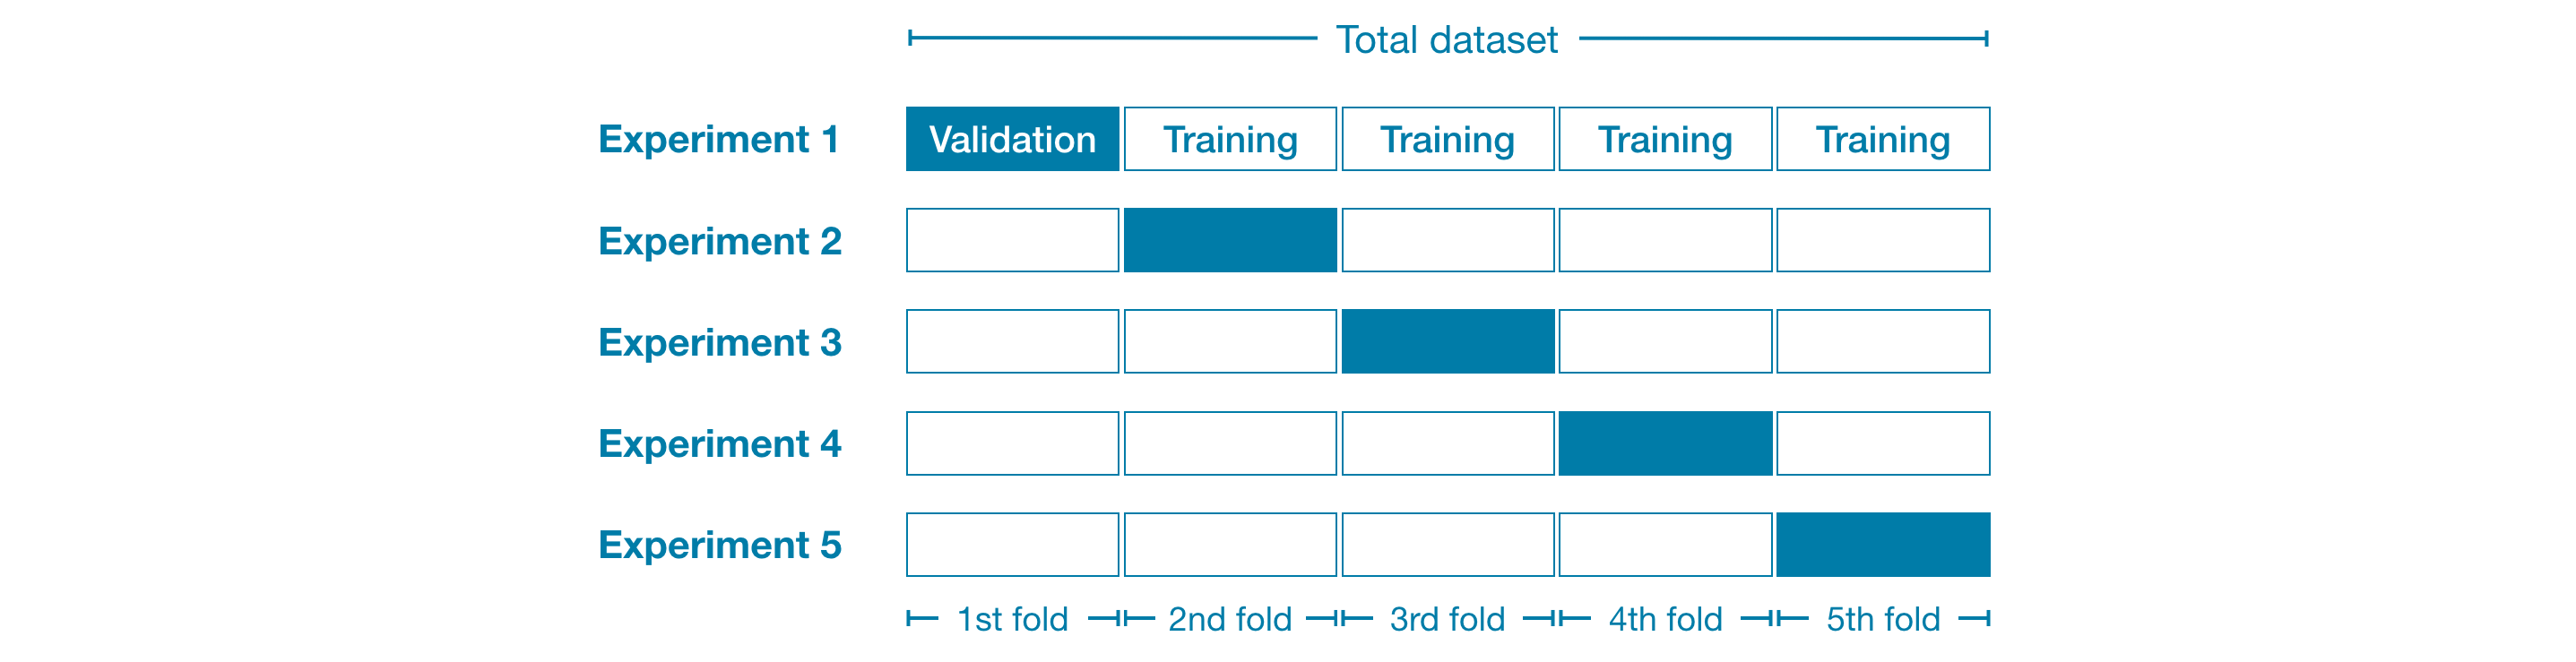

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)

svc = SVC(gamma="auto")
svc.fit(X_train, y_train)

log = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
cross_val_score(dt, X_train, y_train, cv=5, scoring="accuracy").mean() # best accuracy

0.8170673529596385

In [ ]:
cross_val_score(rfc, X_train, y_train, cv=5, scoring="accuracy").mean()

0.8126043562864854

In [ ]:
cross_val_score(svc, X_train, y_train, cv=5, scoring="accuracy").mean()

0.7890214048082355

In [ ]:
cross_val_score(log, X_train, y_train, cv=5, scoring="accuracy").mean()

0.7867491055175444

Source for Classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### Prediction

In [ ]:
X_test = preprocess_pipeline.fit_transform(test_data[["Age", "Fare", "Pclass", "Sex"]])
y_pred = dt.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(test_data.iloc[4])
print(X_test[4])
print(y_pred[4])

Pclass                                                 3
Name        Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Sex                                               female
Age                                                 22.0
SibSp                                                  1
Parch                                                  1
Ticket                                           3101298
Fare                                             12.2875
Cabin                                                NaN
Embarked                                               S
Name: 896, dtype: object
[-0.59890794 -0.4174915   0.          0.          1.          1.
  0.        ]
1


#EKSTRA

kod 1
--
Bu kod, bir Pipeline nesnesi oluşturarak, bir dizi veri ön işleme işlemi gerçekleştiriyor. Pipeline nesnesi, verileri sırayla birkaç adımdan geçirir ve sonunda bir sonuç verir.

num_pipeline olarak adlandırılan bu nesne, iki adımdan oluşur:

SimpleImputer : Eksik verileri ortadan kaldırmak veya doldurmak için kullanılan bir işlemci. Bu örnekte, eksik verilerin ortalaması yerine, medyanı kullanılarak doldurulur.

StandardScaler : Özellikleri standartlaştırmak için kullanılan bir işlemci. Standartlaştırma, her özelliğin ortalama değerinin çıkarılması ve standart sapmasıyla bölünmesi yoluyla gerçekleştirilir. Bu, farklı özelliklerin ölçeklerindeki farklılıkları giderir ve modelin daha iyi performans göstermesini sağlar.

Bu pipeline, genellikle sayısal özelliklerin bulunduğu bir veri kümesinde kullanılır. num_pipeline daha sonra bir ColumnTransformer nesnesiyle birleştirilebilir, böylece farklı tipte özellikleri bir arada işleyebilirsiniz.

Bu bir veri işleme pipeline'ıdır ve kategorik özelliklerin işlenmesi için tasarlanmıştır. Yapılandırılmış bir şekilde veriyi işleyerek, sonuçta daha iyi bir model performansı elde edilmesine yardımcı olur. Pipeline, bir dizi adımdan oluşur ve her bir adımın birbirini takip eden bir şekilde gerçekleştirilmesi için tasarlanmıştır.

Bu özel pipeline, üç adım içerir:

* OrdinalEncoder: Bu adım, kategorik özellikleri sayısal değerlere dönüştürür. Bu dönüşüm, özellikleri modele beslemek için gereken sayısal değerlere dönüştürür. Bu adım, özelliklerin sıralı olması durumunda özellik değerlerini sırayla kodlamak için kullanılır.

* SimpleImputer: Bu adım, eksik verileri tamamlamak için kullanılır. "most_frequent" stratejisi kullanılır, yani eksik verilerin yerine en sık görülen değer atanır. Bu, modele daha doğru bir veri kümesi sağlar.

* OneHotEncoder: Bu adım, kategorik özellikleri ikili bir matrise dönüştürür. Bu, özellikleri modele beslemek için gereken sayısal değerlere dönüştürür. Bu adım, kategorik özelliklerin sıralı olmadığı durumlarda kullanılır.


Bu pipeline, sırasıyla kategorik özellikleri sayısal değerlere dönüştürür, eksik verileri tamamlar ve son olarak ikili bir matris olarak kodlar. Bu sayede, modele beslemek için uygun bir veri kümesi oluşturulur.


---
İkili matris kodlama, kategorik özelliklerin işlenmesi için yaygın bir yöntemdir. Bu yöntemde, her bir kategorik özellik ikili bir matrise dönüştürülür. Bu, özellikleri modele beslemek için gereken sayısal değerlere dönüştürür ve ayrıca özelliklerin birbirleriyle karşılaştırılması ve ilişkilendirilmesi için de kullanılır.

İkili matris kodlama, her bir kategorik özellik için bir sütun oluşturur ve her bir özellik değeri için bir satır ekler. Özellik değeri, sütunun ilgili hücresinde 1 olarak kodlanır ve diğer hücrelerde 0 olarak kodlanır. Bu sayede, her özellik değeri benzersiz bir ikili kod elde eder.

Bu kodlama yöntemi, özelliklerin sayısal olmadığı durumlarda kullanılır. Örneğin, bir özellik "renk" olabilir ve bu özelliğin değerleri "kırmızı", "mavi" ve "yeşil" gibi kategorik değerler olabilir. Bu değerlerin sayısal bir değere dönüştürülmesi uygun değildir çünkü bu değerler birbirleriyle doğrudan karşılaştırılamazlar. Ancak, ikili matris kodlama yöntemi kullanılarak her bir özellik değeri benzersiz bir ikili kod elde edilebilir ve bu kodlar sayısal bir forma dönüştürülebilir.

Bu nedenle, ikili matris kodlama yöntemi, kategorik özelliklerin işlenmesinde yaygın olarak kullanılır ve bu sayede modele beslemek için uygun bir veri kümesi elde edilir.

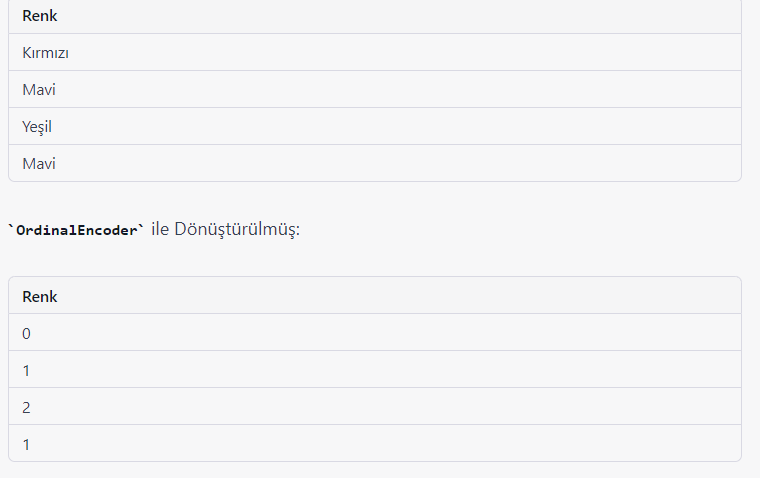

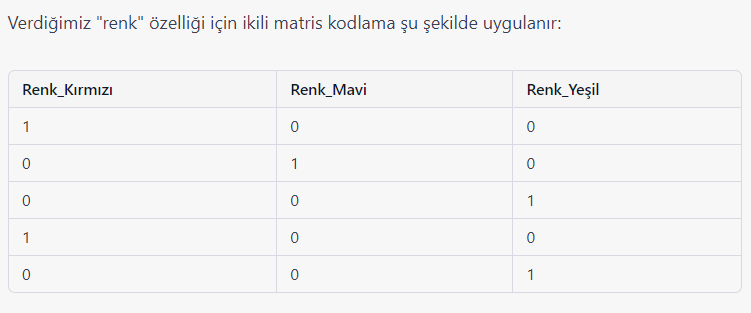

OneHotEncoder ve OrdinalEncoder, kategorik özelliklerin sayısal değerlere dönüştürülmesi için farklı yaklaşımlar kullanır.

OrdinalEncoder, kategorik özellikleri sıralı bir şekilde sayısal değerlere dönüştürürken, OneHotEncoder her kategori için farklı bir sütun veya dizi oluşturarak sayısal değerlere dönüştürür.

Bu nedenle, eğer bir özellik sıralıysa ve sırasının bir anlamı varsa, OrdinalEncoder kullanmak daha uygun olabilir. Ancak, özellik sırasızsa ve her kategori eşit öneme sahipse, OneHotEncoder kullanmak daha uygun olabilir.

Bununla birlikte, bazı durumlarda, özelliklerin hem sırası hem de ayrık kategorileri varsa, her iki encoder da birlikte kullanılabilir. Ancak bu durumda, dönüştürülmüş özelliklerin anlamlı bir şekilde yorumlanması zor olabilir ve birbirleriyle çelişen bilgiler içerebilir. Bu nedenle, her zaman özelliklere uygun dönüştürme yöntemleri seçmeye çalışmak önemlidir.

---
YANİ SAYILARIN SIRALAMA ANLAMLARI DA VARSA ÖNEMLİ

